In [298]:
import numpy as np
import pandas as pd

## Exercise 1

In [299]:
data = np.loadtxt('dax_data.txt', delimiter='\n')

In [300]:
len(data)

6940

In [301]:
data[:10]

array([5787.24 , 5925.3  , 5953.39 , 5963.576, 5973.762, 5983.948,
       5994.134, 6004.32 , 5941.24 , 6178.01 ])

In [302]:
fc = np.fft.fft(data)

In [303]:
np.fft.ifft(fc).real

array([ 5787.24,  5925.3 ,  5953.39, ..., 10464.11, 10301.56, 10490.65])

In [304]:
def get_n_largest_coeff_index(coeff_array,n=1):
    coeff_indices = np.argsort(-np.abs(coeff_array))[:n]
    return coeff_indices

In [305]:
largest_coeff_indices = get_n_largest_coeff_index(fc,10)
largest_coeff_indices

array([   0, 6939,    1,    2, 6938, 6937,    3,    5, 6935, 6932],
      dtype=int64)

In [306]:
def sample_with_n_largest_coeff(coeff_array,n=1):
    largest_coeff_indices = get_n_largest_coeff_index(coeff_array,n)
    coeff_array_copy = coeff_array.copy()
    for i in range(len(coeff_array)):
        if i not in largest_coeff_indices:
            coeff_array_copy[i]=0
#     coeff_array[:10]
    return coeff_array_copy

In [307]:
n_largest_fc = sample_with_n_largest_coeff(fc,30)
n_largest_fc

array([52336134.25999999       +0.j        ,
        3122711.20935124+10819924.90547376j,
       -1351800.3833353  +6966379.90136995j, ...,
        1996878.66074244 -3485687.84721586j,
       -1351800.3833353  -6966379.90136995j,
        3122711.20935124-10819924.90547376j])

In [308]:
compressed_sample = np.fft.ifft(n_largest_fc)
compressed_sample.real

array([8916.0631319 , 8879.19090511, 8842.3315188 , ..., 9026.72671791,
       8989.83405609, 8952.94518752])

In [ ]:
def compress_data

In [309]:
def distance_from_actual_value(actual_value,approximate_value):
    return np.sum(actual_value-approximate_value.real)

In [310]:
distance_from_actual_value(data,sample_with_n_largest_coeff(fc,3000))

5774375.179261576

In [311]:
import matplotlib.pyplot as plt

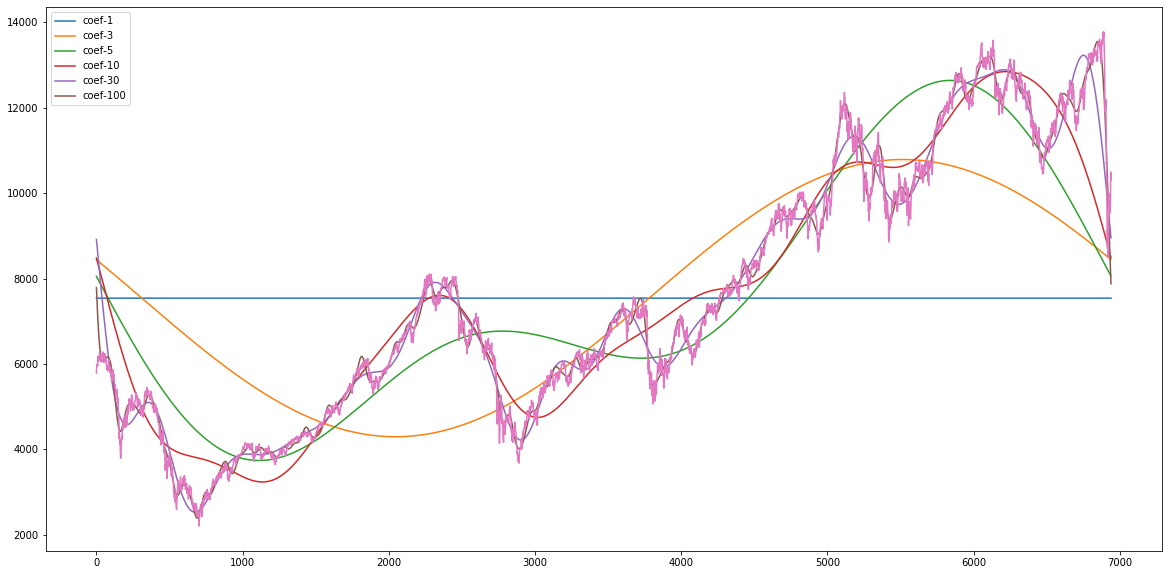

In [312]:
coeff_numbers = [1,3,5,10,30,100]
plt.figure(figsize=(20,10))
for coeff_number in coeff_numbers:
    plt.plot(np.fft.ifft(sample_with_n_largest_coeff(fc,coeff_number)).real,label=f'coef-{coeff_number}')

plt.legend()
plt.plot(data)
